In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

# 데이터 불러오기 & 정보 확인



Name : 게임의 이름입니다. \
Platform : 게임이 지원되는 플랫폼의 이름입니다.\
Year : 게임이 출시된 연도입니다.\
Genre : 게임의 장르입니다.\
Publisher : 게임을 배급한 회사입니다.\
NA_Sales : 북미지역에서의 출고량입니다.\
EU_Sales : 유럽지역에서의 출고량입니다.\
JP_Sales : 일본지역에서의 출고량입니다.\
Other_Sales : 기타지역에서의 출고량입니다.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

In [3]:
df.head(20)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [4]:
df.shape

(16598, 10)

In [5]:
df.describe()

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


In [6]:
df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [8]:
original = df.copy()

# 데이터 시각화 및 전처리

In [9]:
df = df.iloc[:,1:]

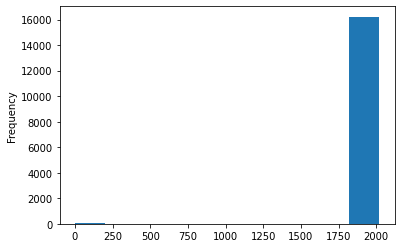

In [10]:
df['Year'].plot(kind = 'hist')

(1800.0, 2030.0)

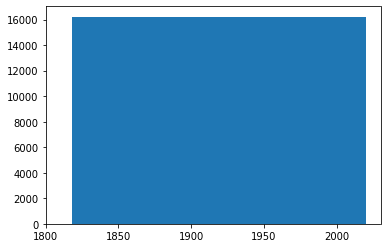

In [11]:
plt.hist(df['Year'])
plt.xlim(1800, 2030)

(0.0, 150.0)

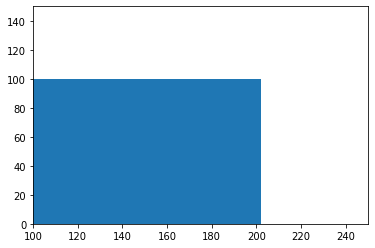

In [12]:
plt.hist(df['Year'])
plt.xlim(100, 250)
plt.ylim(0,150)

In [13]:
df[(df['Year'] <= 200)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [14]:
df['Year'].astype('float')

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

'year'컬럼 결측치 처리

In [15]:
def new_year(values):
  if values == 0:
        return 2000
  elif values <= 20:
        return 2000 + values
  elif values <= 99:
        return 1900 + values
  else:
        return values

df['Year'] = df['Year'].apply(new_year)
 

(array([ 108.,   65.,   89.,  443., 1269., 2435., 3914., 5257., 2399.,
         348.]),
 array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
        2016., 2020.]),
 <a list of 10 Patch objects>)

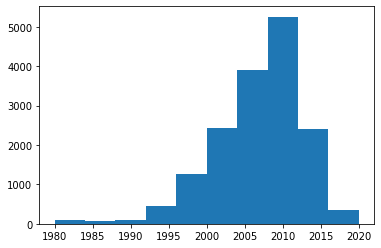

In [16]:
plt.hist(df['Year'])

(1999.0, 2003.0)

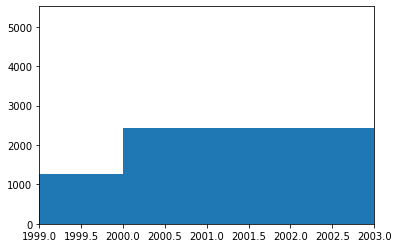

In [17]:
plt.hist(df['Year'])
plt.xlim(1999, 2003)

In [18]:
#Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)일본 판매량만 있는 행 발견해서 기존 행에 넣어준 뒤, 행삭제
df[df['Year'].isna() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [19]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [20]:
df[df['Name'] == "Yu-Gi-Oh! 5D's Wheelie Breakers"]['JP_Sales'].index

Int64Index([8289], dtype='int64')

In [21]:
df.iloc[8290,7] = 0.2
df.iloc[8290,:]

Name            FIFA Soccer 11
Platform                   PS2
Year                    2010.0
Genre                   Sports
Publisher      Electronic Arts
NA_Sales                  0.11
EU_Sales                  0.29
JP_Sales                   0.2
Other_Sales               0.36
Name: 8290, dtype: object

In [22]:
df[df['Year'].isna() == True].sample(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
15147,Nicktoons: Battle for Volcano Island,GC,NaN,Action,Unknown,0.22,0.06,0,0.01
12307,Port Royale 3,PS3,NaN,Simulation,Kalypso Media,0.06,0,0,0.01
15655,Runaway: A Twist of Fate,DS,NaN,Adventure,Focus Home Interactive,0,0.02,0,0
6385,Dead Island: Riptide,PC,NaN,Action,Deep Silver,0,0.07,0,0.01
8546,Build-A-Bear Workshop: Friendship Valley,Wii,NaN,Misc,Unknown,0.06,0,0,0
8333,Splatterhouse,PS3,NaN,Action,Namco Bandai Games,0.13,0.02,0,0.02
11405,Gun,X360,NaN,Shooter,Activision,0.24,0.01,0,0.02
9640,Cubix Robots for Everyone: Clash 'n' Bash,GBA,NaN,Action,Unknown,0.26,0.1,0,0.01
5144,Yakuza 4,PS3,NaN,Action,Sega,0.15,0.14,0.63,0.05
11309,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0,0.1


In [23]:
index1 = df[(df['Name'].str[-4:].str.isnumeric()==True)& (df['Year'].isna() == True)].index
yearlist = df[(df['Name'].str[-4:].str.isnumeric()==True)& (df['Year'].isna() == True)]['Name'].str[-4:].astype('int')
df.loc[index1,'Year'] = yearlist

In [24]:
df.iloc[2492,:]

Name           Madden NFL 2002
Platform                    XB
Year                    2002.0
Genre                   Sports
Publisher              Unknown
NA_Sales                  0.53
EU_Sales                  0.02
JP_Sales                     0
Other_Sales               0.03
Name: 2492, dtype: object

In [25]:
df.isna().sum()

Name             0
Platform         0
Year           256
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [26]:
df['year1'] = df['Name'].str.extract('(\d+)').astype('float')
index2 = df[(df['year1']>=1000) & (df['Year'].isna() == True)].index
yearlist2 =df[(df['year1']>=1000) & (df['Year'].isna() == True)]['year1']
df.loc[index2, 'Year'] = yearlist2
df = df.iloc[:,:-1]
df.isna().sum()

Name             0
Platform         0
Year           254
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [27]:
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [28]:
df['NA_Sales'].value_counts()

0        4443
0.02      537
0.01      536
0.03      528
0.05      523
         ... 
6.91        1
3.88        1
4.14        1
1.11M       1
4.18        1
Name: NA_Sales, Length: 494, dtype: int64

In [29]:
#중복값 갯수 확인
df.duplicated().sum()

1

In [30]:
#중복값 드롭
df.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


출고량 데이터 전처리
K, M 삭제 후 데이터 단위 맞추기

In [31]:
#문자포함 데이터 갯수 확인
print(df['NA_Sales'].str.contains('K').sum())
print(df['NA_Sales'].str.contains('k').sum())
print(df['NA_Sales'].str.contains('M').sum())
print(df['NA_Sales'].str.contains('m').sum())

100
0
100
0


In [32]:
#데이터 변환 함수 지정하기
def sale(value):
    if value.find('K') != -1:
      return float(value.strip('K'))*1000

    elif value.find('M') != -1:
      return float(value.strip('M'))*1000000

    else:
      return float(value)*1000000


In [33]:
df['NA_Sales'] = df['NA_Sales'].apply(sale)
df['EU_Sales'] = df['EU_Sales'].apply(sale)
df['JP_Sales'] = df['JP_Sales'].astype('str').apply(sale)
df['Other_Sales'] = df['Other_Sales'].apply(sale)

**2. 결측치인 행 제거**


In [34]:
df.dropna(inplace = True)

In [35]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

# 분석에 필요한 새로운 변수 생성
1. 출고량을 모두 합친 총 출고량 열 생성
2. 연도를 5년단위로 범주화한 열 생성

In [36]:
df['all_Sales'] = df['EU_Sales']+ df['JP_Sales']+ df['NA_Sales']+df['Other_Sales']

In [37]:
df['Year'].describe()

count    16257.000000
mean      2006.406225
std          5.830051
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [38]:
bins = list(range(1980, 2021, 5))
bins_label = ['1980-1985년','1986-1990년','1991-1995년','1996-2000년','2001-2005년','2006-2010년','2011-2015년','2016-2020년']
df["Year_category"] = pd.cut(df["Year"], bins, labels = bins_label)

In [39]:
df['Year_category'].value_counts()

2006-2010년    6309
2001-2005년    3763
2011-2015년    3523
1996-2000년    1612
1991-1995년     484
2016-2020년     346
1980-1985년     127
1986-1990년      85
Name: Year_category, dtype: int64

# 데이터 분석 
**1. 지역별 분석**

지역에 따라서 선호하는 게임 장르가 다를까?\
지역 구분 기준\
지역별로 선호하는 게임의 장르\
지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각하는가?


**2. 연도별 분석**

트렌드는 어떤 것을 기준으로 파악했는가?\
연도별로 트렌드가 존재하는가?\
왜 존재한다/존재하지 않는다고 생각하는가?

**3. 인기게임 시각화**

인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함
인기가 많다는 것을 어떻게 정의했나요?\
해당 게임이 왜 인기가 많다고 생각했나요?\
시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?\
해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?\

**4. 다음분기에 어떤 게임을 설계하는가 결론**

다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되어야 합니다.


더불어 유의미한 인사이트를 도출하기 위해서는

다음 분기가 언제인지
회사의 규모는 어느정도인지
와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.

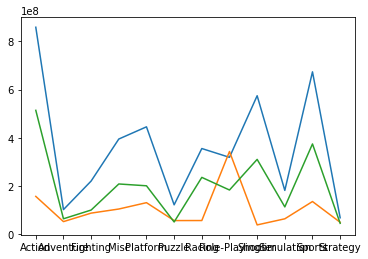

In [40]:
plt.plot(df['NA_Sales'].groupby(df['Genre']).sum())
plt.plot(df['JP_Sales'].groupby(df['Genre']).sum())
plt.plot(df['EU_Sales'].groupby(df['Genre']).sum())


In [41]:
#한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq;

In [42]:
#한글 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumB

# 지역별 분석

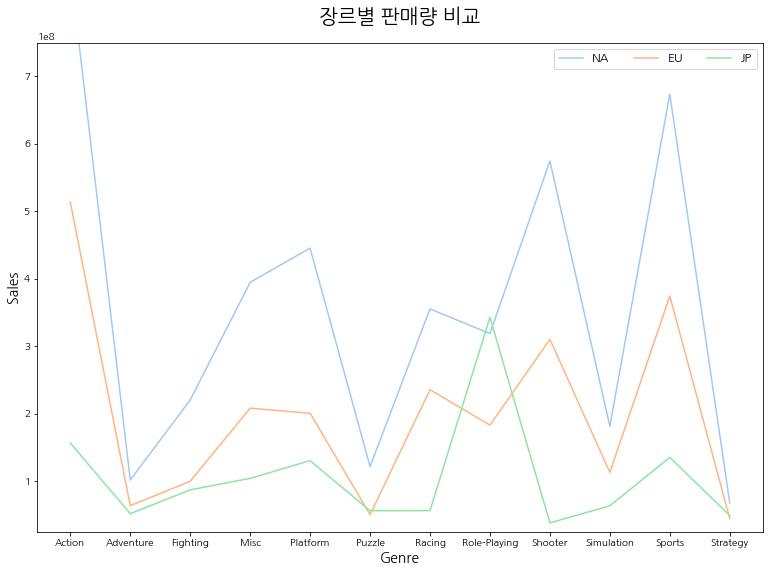

In [43]:
#전체 데이터 판매량 분석
fig = plt.figure(figsize=(13,9))
palette = sns.set_palette('pastel')
plt.title('장르별 판매량 비교', fontsize = 20, pad=20)
sns.lineplot(data = df['NA_Sales'].groupby(df['Genre']).sum(),label = 'NA')
sns.lineplot(data = df['EU_Sales'].groupby(df['Genre']).sum(),label = 'EU')
sns.lineplot(data = df['JP_Sales'].groupby(df['Genre']).sum(),label ='JP')
plt.ylim(25000000, 750000000)
plt.xlabel('Genre',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=3,fontsize=12) 
plt.show()

In [44]:
df2000 = df[df['Year']>=2000]

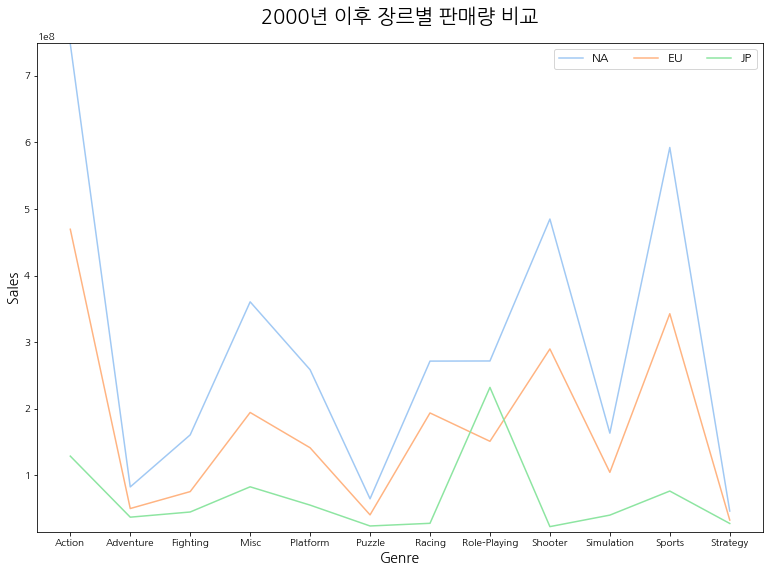

In [45]:
#2000년대 이후 데이터 판매량 분석
fig = plt.figure(figsize=(13,9))
palette = sns.set_palette('pastel')
plt.title('2000년 이후 장르별 판매량 비교', fontsize = 20, pad=20)
sns.lineplot(data = df2000['NA_Sales'].groupby(df['Genre']).sum(),label = 'NA')
sns.lineplot(data = df2000['EU_Sales'].groupby(df['Genre']).sum(),label = 'EU')
sns.lineplot(data = df2000['JP_Sales'].groupby(df['Genre']).sum(),label ='JP')
plt.ylim(15000000, 750000000)
plt.xlabel('Genre',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=3,fontsize=12) 
plt.show()

In [46]:
df['Genre'].value_counts()

Action          3241
Sports          2311
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1222
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

# **지역에 따른 장르별 게임 선호도 차이 결론**

1. 출고량의 순위가 북아메리카, 유럽, 일본 순으로 대략 비슷하게 분포되고 있는 것을 볼 수 있다.
2. 다만, 전체 10개의 장르 중 puzzle, Role-playing, Strategy 3개의 장르에서 미세하게 분포가 바뀌는 모습을 볼 수 있다.
3. 특히 북아메리카와 유럽의 그래프변화폭은 유사했지만, 일본만 세 장르에서 차이가 있는 것으로 보아 서구권과 아시아권 문화에 따른 현상이라고 유추해볼 수 있다.
4. 하지만, 이러한 차이도 2000년도 이후 출고량만 분석한 그래프에서는 더욱 둔화되었다.
5. 따라서 지역에 따른 장르별 게임 선호도 차이는 거의 없으며, 더더욱 사라지고 있는 것으로 결론지을 수 있다.

In [47]:
df.corr().style.background_gradient(cmap='Blues')

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_Sales
Year,1.000000,-0.091941,0.005222,-0.172210,0.040579,-0.075789
NA_Sales,-0.091941,1.000000,0.768048,0.448933,0.634978,0.941536
EU_Sales,0.005222,0.768048,1.000000,0.432073,0.727968,0.902872
JP_Sales,-0.172210,0.448933,0.432073,1.000000,0.285256,0.608924
Other_Sales,0.040579,0.634978,0.727968,0.285256,1.000000,0.748404
all_Sales,-0.075789,0.941536,0.902872,0.608924,0.748404,1.000000


In [48]:
#pca하기 위한 데이터 정제, 문자 데이터 라벨인코딩
df1 = df.iloc[:,:-1]
name = df1['Name']
df1.set_index('Name',drop= True,inplace = True)

from sklearn.preprocessing import LabelEncoder
df1.loc[:, ['Genre','Publisher','Platform']] = df1.loc[:,['Genre','Publisher','Platform']].apply(LabelEncoder().fit_transform)

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
#정규화
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

In [52]:
pca = PCA()
pca.fit(df2)

PCA()

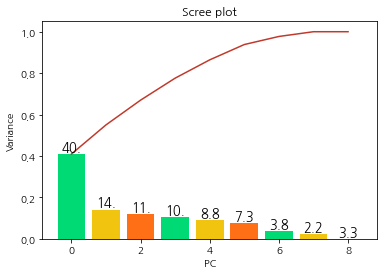

In [53]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)

In [54]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,'기여율': pca.explained_variance_ratio_},
                      index = np.array([f"pca{num+1}" for num in range(df2.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3.682133e+00,4.091008e-01,0.409101
pca2,1.267501e+00,1.408248e-01,0.549926
pca3,1.076110e+00,1.195604e-01,0.669486
pca4,9.562441e-01,1.062428e-01,0.775729
pca5,7.956572e-01,8.840092e-02,0.864130
pca6,6.660296e-01,7.399874e-02,0.938128
pca7,3.503219e-01,3.892226e-02,0.977051
pca8,2.065566e-01,2.294932e-02,1.000000
pca9,3.004292e-32,3.337897e-33,1.000000


In [55]:
#pca진행
pca = PCA(5)
pca.fit(df2)
B = pca.transform(df2)

In [56]:
#pca 데이터 프레임에 만들기
pca_df = pd.DataFrame(B,columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_df

,pc1,pc2,pc3,pc4,pc5
0,-0.694832,-0.227544,0.819412,1.915671,0.466527
1,-0.494556,1.394823,0.529950,0.097234,-1.120213
2,-0.689552,0.855594,-0.392936,1.590241,-0.425034
3,-0.660345,-0.093266,1.915689,-0.422809,1.045484
4,-0.376202,0.581855,-0.539258,0.907854,0.154850
...,...,...,...,...,...
16252,-0.445224,-0.448656,1.466443,-0.612466,0.577066
16253,-0.643164,0.477208,1.134705,-0.025617,-0.932351
16254,0.331841,0.890226,-0.139219,-1.561851,1.417475
16255,-0.177429,1.322729,1.527435,-0.332890,-0.443266


In [57]:
 # kmean clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state = 42)
kmeans.fit(pca_df)

KMeans(n_clusters=6, random_state=42)

In [58]:
# cluster 열 추가
cluster_labels = kmeans.labels_
pca_df = pca_df.assign(Cluster = cluster_labels)

In [59]:
cluster = pca_df['Cluster']
df['cluster']=cluster
df['Year_category'].astype('category')

0        2006-2010년
1        2006-2010년
2        2006-2010년
3        2006-2010년
4        2006-2010년
            ...    
16593    2006-2010년
16594    2001-2005년
16595    2011-2015년
16596    2011-2015년
16597    1996-2000년
Name: Year_category, Length: 16257, dtype: category
Categories (8, object): ['1980-1985년' < '1986-1990년' < '1991-1995년' < '1996-2000년' < '2001-2005년' <
                         '2006-2010년' < '2011-2015년' < '2016-2020년']

In [60]:
#그룹별 데이터 분리
C0 = df[df['cluster']==0]
C1 = df[df['cluster']==1]
C2 = df[df['cluster']==2]
C3 = df[df['cluster']==3]
C4 = df[df['cluster']==4]
C5 = df[df['cluster']==5]

# 연도별 분석

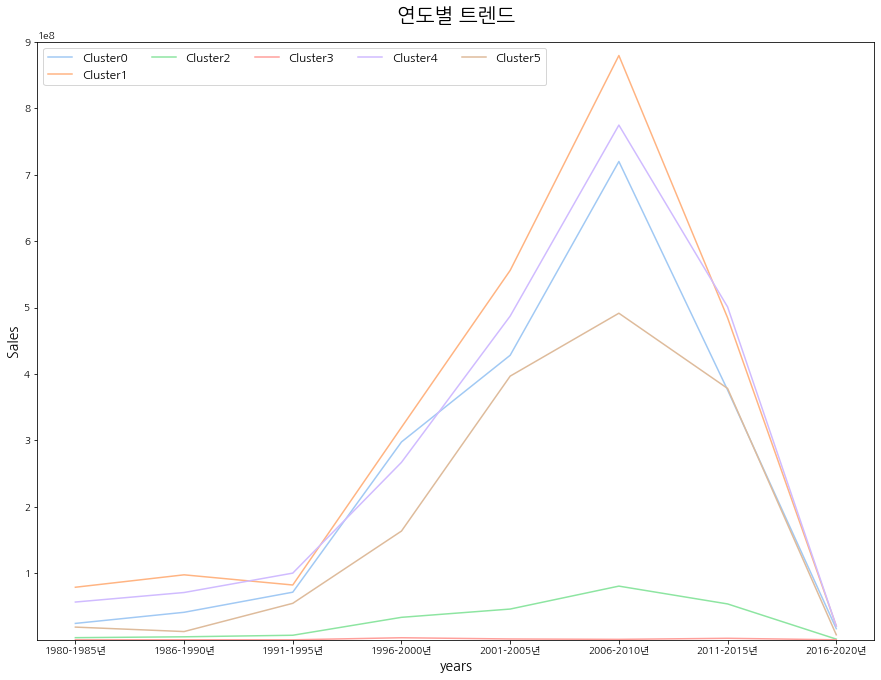

In [61]:
#연도별 변화 추이
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('연도별 트렌드', fontsize = 20, pad=20)
sns.lineplot(data = C0['all_Sales'].groupby(C0['Year_category']).sum(),label = 'Cluster0')
sns.lineplot(data = C1['all_Sales'].groupby(C1['Year_category']).sum(),label = 'Cluster1')
sns.lineplot(data = C2['all_Sales'].groupby(C2['Year_category']).sum(),label = 'Cluster2')
sns.lineplot(data = C3['all_Sales'].groupby(C3['Year_category']).sum(),label = 'Cluster3')
sns.lineplot(data = C4['all_Sales'].groupby(C4['Year_category']).sum(),label = 'Cluster4')
sns.lineplot(data = C5['all_Sales'].groupby(C5['Year_category']).sum(),label = 'Cluster5')
plt.ylim(100, 900000000)
plt.xlabel('years',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=5,fontsize=12,loc = 'upper left') 
plt.show()

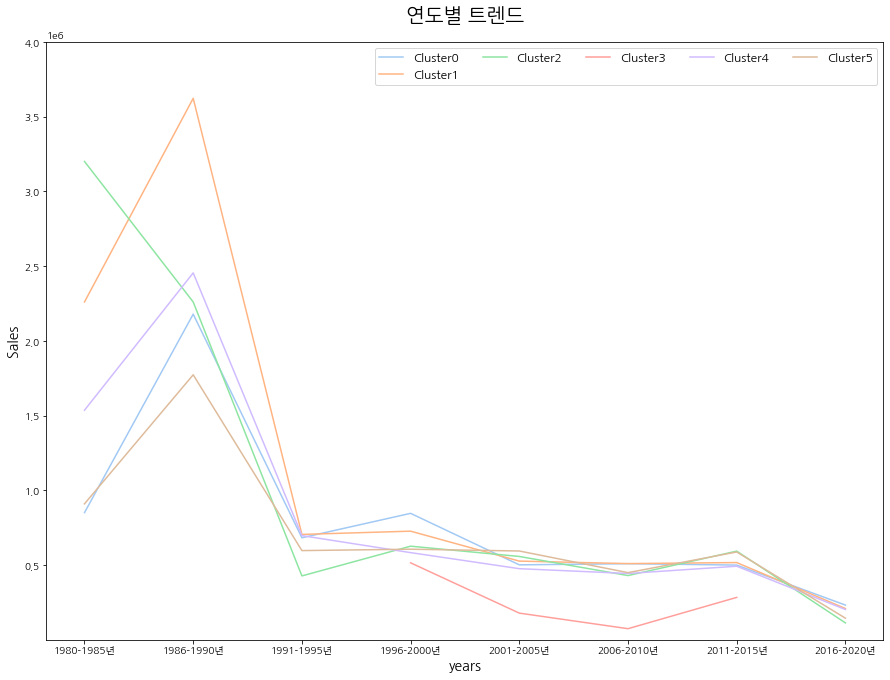

In [101]:
#연도별 변화 추이(평균)
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('연도별 트렌드', fontsize = 20, pad=20)
sns.lineplot(data = C0['all_Sales'].groupby(C0['Year_category']).mean(),label = 'Cluster0')
sns.lineplot(data = C1['all_Sales'].groupby(C1['Year_category']).mean(),label = 'Cluster1')
sns.lineplot(data = C2['all_Sales'].groupby(C2['Year_category']).mean(),label = 'Cluster2')
sns.lineplot(data = C3['all_Sales'].groupby(C3['Year_category']).mean(),label = 'Cluster3')
sns.lineplot(data = C4['all_Sales'].groupby(C4['Year_category']).mean(),label = 'Cluster4')
sns.lineplot(data = C5['all_Sales'].groupby(C5['Year_category']).mean(),label = 'Cluster5')
plt.ylim(100, 4000000)
plt.xlabel('years',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=5,fontsize=12,loc = 'upper right') 
plt.show()

In [63]:
df2000 = df[(df["Year"]>=2000) & (df['cluster'].isna() == False)]
df2000['cluster'] = df[(df["Year"]>=2000)& (df['cluster'].isna() == False)]['cluster']

<ipython-input-63-593cb72739cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000['cluster'] = df[(df["Year"]>=2000)& (df['cluster'].isna() == False)]['cluster']


In [65]:
#2000년대 이후 데이터 그룹화
CC0 = df2000[df2000['cluster']==0]
CC1 = df2000[df2000['cluster']==1]
CC2 = df2000[df2000['cluster']==2]
CC3 = df2000[df2000['cluster']==3]
CC4 = df2000[df2000['cluster']==4]
CC5 = df2000[df2000['cluster']==5]

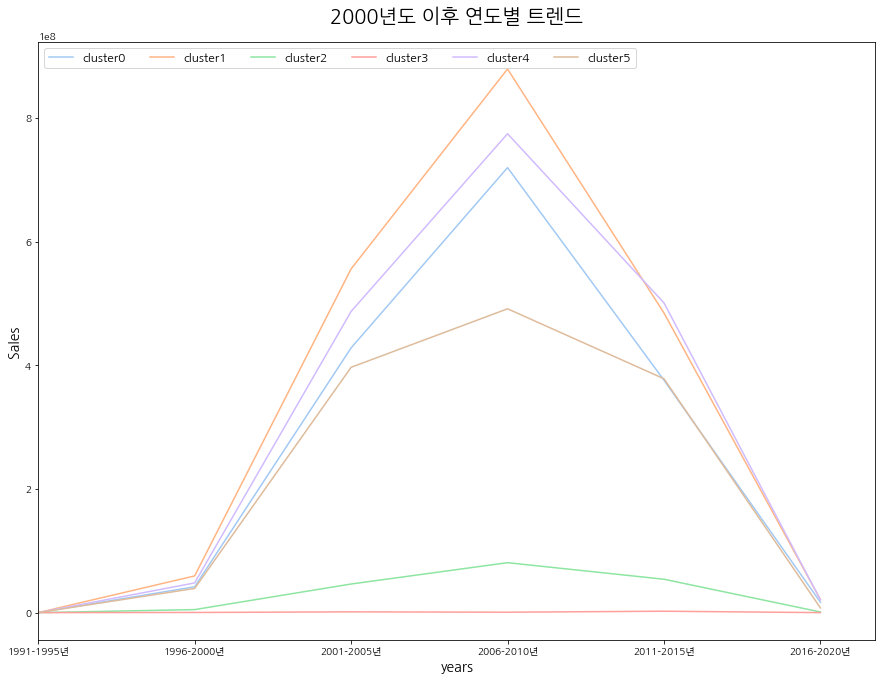

In [97]:
#2000년 이후 연도별 변화 추이
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('2000년도 이후 연도별 트렌드', fontsize = 20, pad=20)
sns.lineplot(data = CC0['all_Sales'].groupby(CC0['Year_category']).sum(),label = 'cluster0')
sns.lineplot(data = CC1['all_Sales'].groupby(CC1['Year_category']).sum(),label = 'cluster1')
sns.lineplot(data = CC2['all_Sales'].groupby(CC2['Year_category']).sum(),label = 'cluster2')
sns.lineplot(data = CC3['all_Sales'].groupby(CC3['Year_category']).sum(),label = 'cluster3')
sns.lineplot(data = CC4['all_Sales'].groupby(CC4['Year_category']).sum(),label = 'cluster4')
sns.lineplot(data = CC5['all_Sales'].groupby(CC5['Year_category']).sum(),label = 'cluster5')
plt.xlim(2)
plt.xlabel('years',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=6,fontsize=12, loc = 'upper left') 
plt.show()

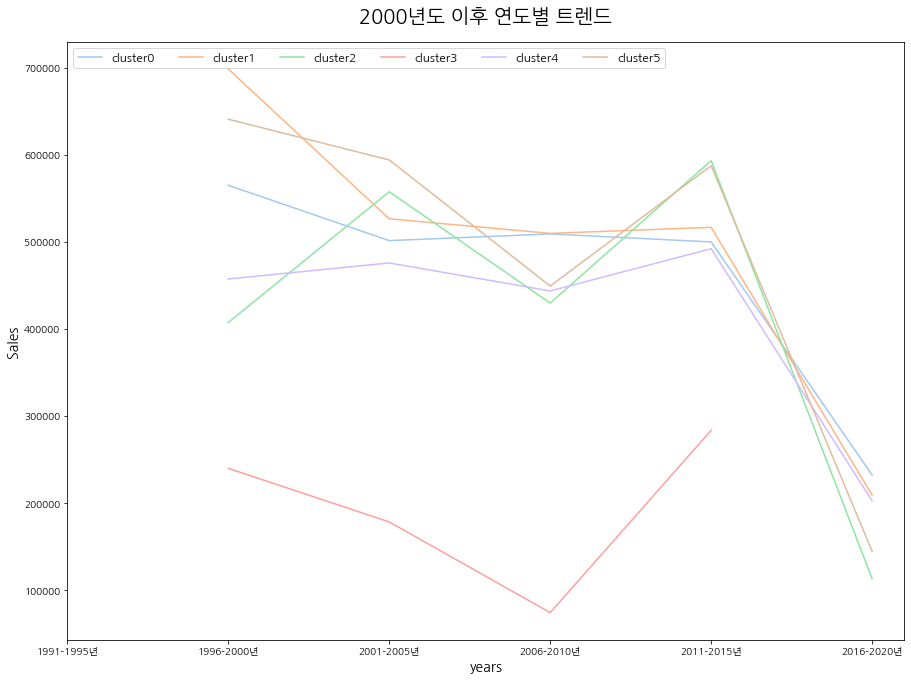

In [111]:
#2000년 이후 연도별 변화 추이(평균)
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('2000년도 이후 연도별 트렌드', fontsize = 20, pad=20)
sns.lineplot(data = CC0['all_Sales'].groupby(CC0['Year_category']).mean(),label = 'cluster0')
sns.lineplot(data = CC1['all_Sales'].groupby(CC1['Year_category']).mean(),label = 'cluster1')
sns.lineplot(data = CC2['all_Sales'].groupby(CC2['Year_category']).mean(),label = 'cluster2')
sns.lineplot(data = CC3['all_Sales'].groupby(CC3['Year_category']).mean(),label = 'cluster3')
sns.lineplot(data = CC4['all_Sales'].groupby(CC4['Year_category']).mean(),label = 'cluster4')
sns.lineplot(data = CC5['all_Sales'].groupby(CC5['Year_category']).mean(),label = 'cluster5')
plt.xlim(2)
plt.xlabel('years',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=6,fontsize=12, loc = 'upper left') 
plt.show()

**연도별 분석 결과**

위의 평균 그래프로 보았을 때에, 시간에 따라 전체 출고량이 어떻게 변화하는지 파악했다.

2000년도 이후 그래프와 전체 데이터 그래프 모두 변화 추세가 동일하기 때문에 시간에 따른 게임 선호도의 트랜드가 존재하는 것으로 확인된다.






(100.0, 10000000.0)

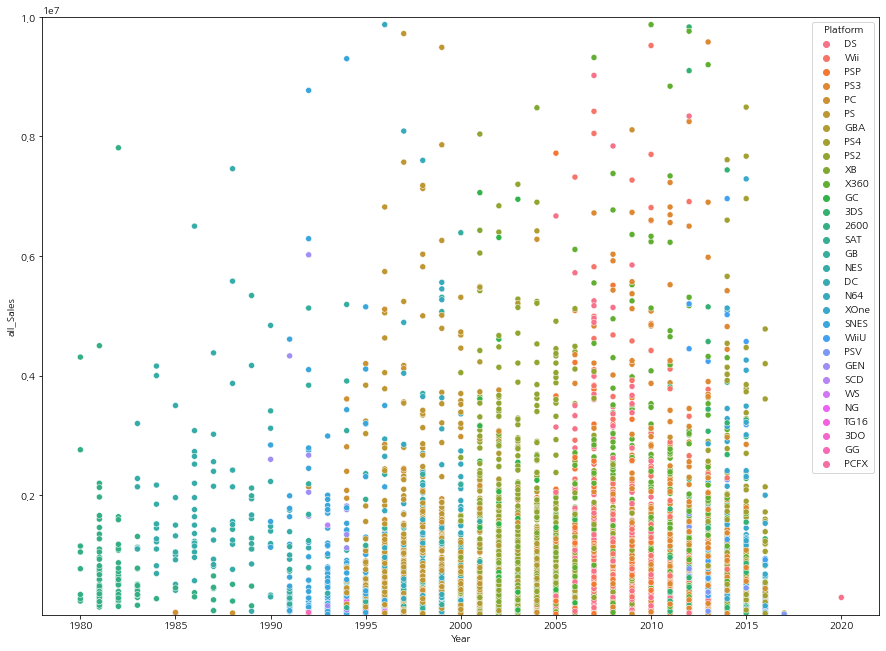

In [68]:
#전체 데이터의 색 분포 상태로 플랫폼에 트랜드가 있는것을 확인함
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('', fontsize = 20, pad=20)
sns.scatterplot(data = df, x = df['Year'] ,y = df['all_Sales'] ,hue = df['Platform'])
plt.ylim(100, 10000000)


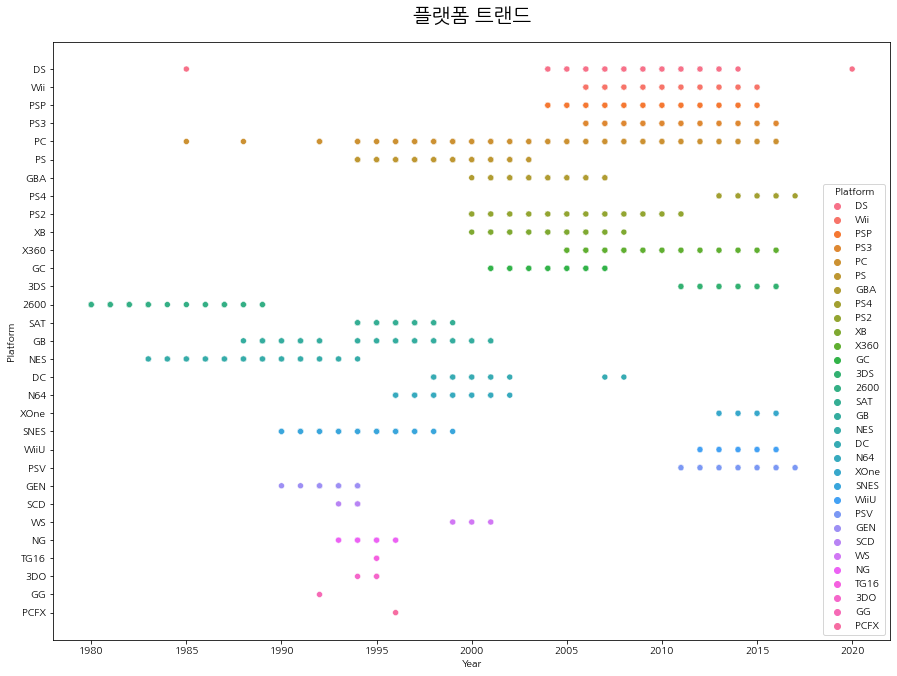

In [103]:
#게임 플렛폼에 연도에 따른 트랜드가 있는 것으로 확인
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('플랫폼 트랜드', fontsize = 20, pad=20)
sns.scatterplot(data = df, x = df['Year'] ,y =  df['Platform'], hue =  df['Platform'])

**연도별 사용 플랫폼 트랜드 파악**

연도별로 사용되는 플랫폼이 각각 다르고, 트랜드가 있는 것으로 나타났다.

또한 최근까지 잘 사용되고 있는 플랫폼이 어떤 것인지 확인할 수 있다.

In [71]:
#연도 카테고리별 데이터 나누기
year1 =df2000[df2000['Year_category'] == '1996-2000년']
year2 =df2000[df2000['Year_category'] == '2001-2005년']
year3 =df2000[df2000['Year_category'] == '2006-2010년']
year4 =df2000[df2000['Year_category'] == '2011-2015년']
year5 =df2000[df2000['Year_category'] == '2016-2020년']

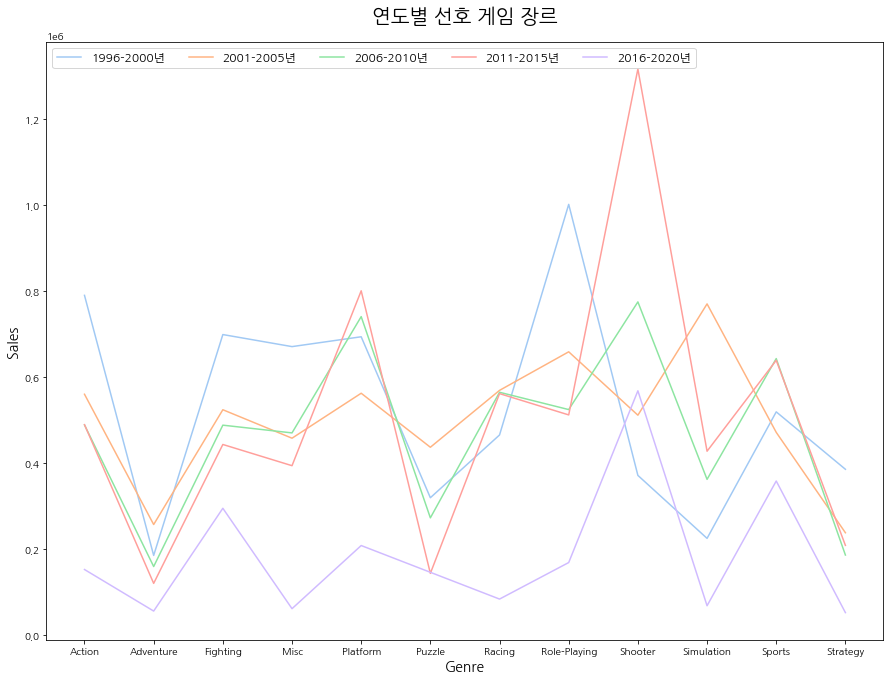

In [79]:
#5년 단위간 연도별 선호하는 게임 장르 추이
fig = plt.figure(figsize=(15,11))
palette = sns.set_palette('pastel')
plt.title('연도별 선호 게임 장르', fontsize = 20, pad=20)
sns.lineplot(data = year1['all_Sales'].groupby(year1['Genre']).mean(),label =  '1996-2000년')
sns.lineplot(data = year2['all_Sales'].groupby(year2['Genre']).mean(),label =  '2001-2005년')
sns.lineplot(data = year3['all_Sales'].groupby(year3['Genre']).mean(),label =  '2006-2010년')
sns.lineplot(data = year4['all_Sales'].groupby(year4['Genre']).mean(),label =  '2011-2015년')
sns.lineplot(data = year5['all_Sales'].groupby(year5['Genre']).mean(),label =  '2016-2020년')
plt.xlabel('Genre',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=6,fontsize=12, loc = 'upper left') 
plt.show()

**게임 장르별 트랜드 파악**

연도에 따라 그래프 추세선이 유사한 것으로 보아, 시간의 흐름에 따른 게임 장르에 대한 선호도 변화는 명확하지 않은 것으로 확인된다.
따라서 게임 장르 선호에서는 트랜드가 없다고 보인다.

# 인기게임 시각화

In [73]:
df_top150 = df.sort_values(['all_Sales'],ascending = False)[:150]
df_top150.reset_index(drop = True, inplace = True)

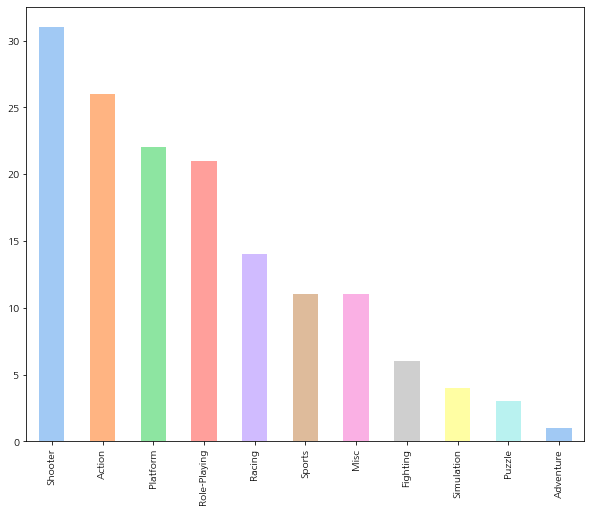

In [104]:
#인기 게임 장르
fig = plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel',11)
df_top150['Genre'].value_counts().plot(kind = 'bar', color = colors)

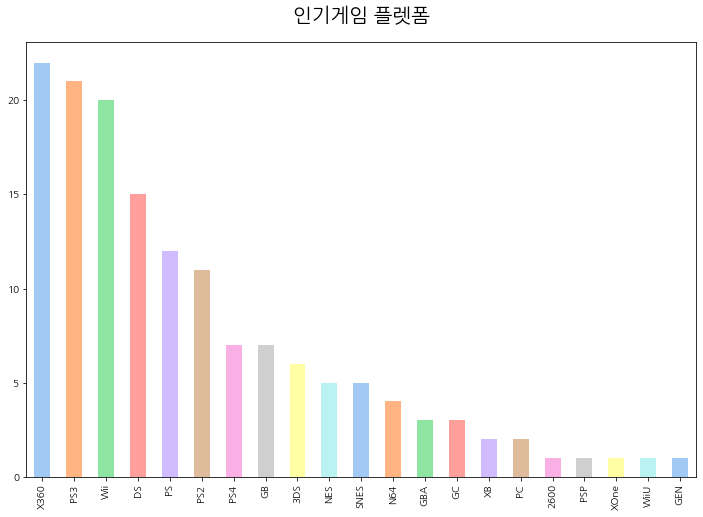

In [75]:
#인기 게임 플렛폼
fig = plt.figure(figsize=(12,8))
colors = sns.color_palette('pastel',21)
plt.title('인기게임 플렛폼', fontsize = 20, pad=20)
df_top150['Platform'].value_counts().plot(kind = 'bar', color = colors)

Text(0, 0.5, 'Genre')

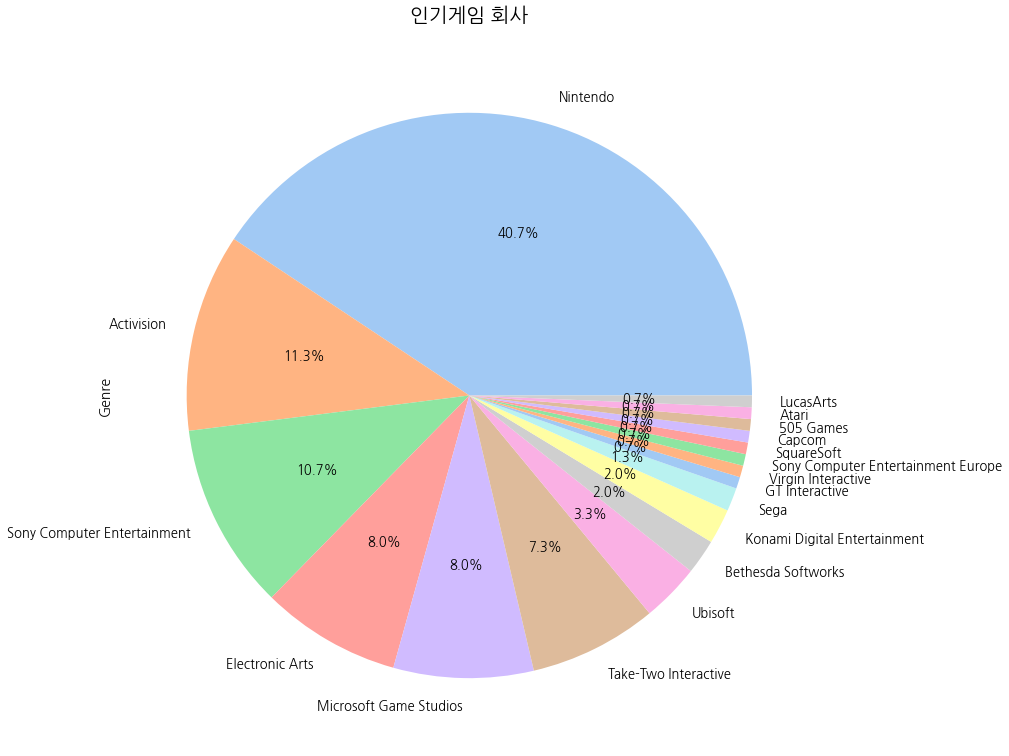

In [96]:
#인기 게임 회사
fig = plt.figure(figsize=(13,13))
plt.title('인기게임 회사', fontsize = 20, pad=20)
df_top150['Publisher'].value_counts().plot(kind = 'pie',autopct='%.1f%%',fontsize = 13)
plt.ylabel('Genre',fontsize = 14)

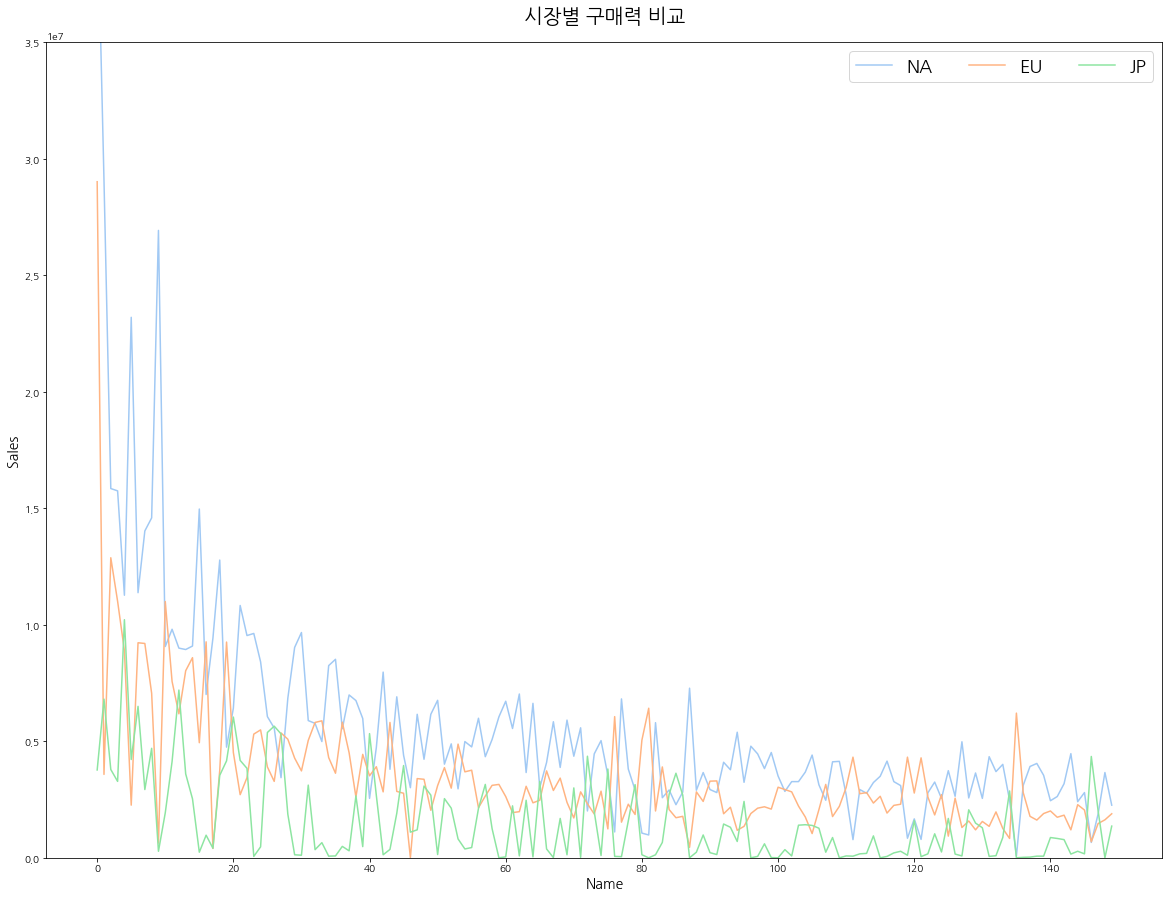

In [78]:
#전체 데이터 판매량 분석
fig = plt.figure(figsize=(20,15))
palette = sns.set_palette('pastel')
plt.title('시장별 구매력 비교', fontsize = 20, pad=20)
sns.lineplot(data = df_top150['NA_Sales'],label = 'NA')
sns.lineplot(data = df_top150['EU_Sales'],label = 'EU')
sns.lineplot(data = df_top150['JP_Sales'],label = 'JP')
plt.ylim(0,35000000)
plt.xlabel('Name',fontsize = 14)
plt.ylabel('Sales',fontsize = 14)
plt.legend(ncol=3,fontsize=18) 
plt.show()

# 어떤 게임을 출시해야할까?

1) 장르\
트랜드 비교에서도 꾸준히 인기높은 장르였고, 선정한 인기 게임 장르에서도 높은 비중을 차지했던 Shooter, Action 장르와
Platform, Role-playing를 추천

2) 플랫폼\
플랫폼 트랜드에서 최근 사용되고 있는 플랫폼 중, 인기 게임에서 높은 비율을 차지하고 있는 X360, PS3,will, DS에서 게임을 출시하는 것이 좋을 것으로 분석됨

3) 협력회사\
인기 게임에서 40퍼센트를 차지하고 있는 nintendo와 
11.3퍼센트를 차지한 Activision 과 함께 협력하여 제작할 것을 추천

4) 타겟시장\
구매력이 좋은 북미를 중심으로 상품 출시 및 홍보 진행